In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

plt.style.use('fivethirtyeight')
year=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

In [2]:
data=pd.read_csv("data/Crime_Data_from_2010_to_2019.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TIME OCC        int64  
 1   Crm Cd          int64  
 2   Crm Cd Desc     object 
 3   Weapon Used Cd  float64
 4   Weapon Desc     object 
 5   DATE            object 
 6   WEEK            object 
 7   DAYTIME         object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.8+ MB


In [3]:
result=pd.read_csv("data/result.csv")
result=result.set_index("Year",drop=True)
result.columns

Index(['Num_Cases', 'Severe_Rate', 'Severe_Perday', 'Severe_PerWeekdays',
       'Severe_PerWeekends', 'Gun_Rate', 'Gun_Perday', 'Gun_PerWeekdays',
       'Gun_PerWeekends', 'Weekdays_Perday', 'Weekends_Perday', 'Dawn_Rate',
       'Morning_Rate', 'Noon_Rate', 'Afternoon_Rate', 'Dusk_Rate',
       'Evening_Rate', 'Midnight_Rate'],
      dtype='object')

In [4]:
gun=pd.read_csv("data/gun_crime.csv")
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49510 entries, 0 to 49509
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      49510 non-null  int64  
 1   TIME OCC        49510 non-null  int64  
 2   Crm Cd          49510 non-null  int64  
 3   Crm Cd Desc     49510 non-null  object 
 4   Weapon Used Cd  49510 non-null  float64
 5   Weapon Desc     49510 non-null  object 
 6   DATE            49510 non-null  object 
 7   WEEK            49510 non-null  object 
 8   DAYTIME         49510 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [5]:
rate_list=[result.columns[1],result.columns[5]]
s_perday_list=[result.columns[2],result.columns[3],result.columns[4]]
g_perday_list=[result.columns[6],result.columns[7],result.columns[8]]
w_perday_list=[result.columns[9],result.columns[10]]
day_rate_list=[result.columns[-1],result.columns[-2],result.columns[-3],result.columns[-4],result.columns[-5],result.columns[-6],result.columns[-7],]

Due to the lack of some crime data in 2012 and 2016, our statistical plot has some flaws, but this doesn't affect the statistics of some specific kinds of crime rates, because these crimes account for a certain proportion of all cases. Here we compare the rates of severe crime and gun crime. Severe crimes are derived from the Los Angeles Police Department's definition of cases that include HOMICIDE, RAPE, ROBBERY and AGGRESSIVE ASSAULTS. Gun crime refers to the criminal suspect's weapons containing various types of guns. 
In the figure, we can see that the proportion of severe crimes has fluctuated and increased, and only in 2013 there has been a large decline (possibly related to the reduction of the felony threshold by California Proposition 47). The proportion of gun crime has not fluctuated significantly.

Text(0.5, 1.0, 'Severe&Gun Crime Rate Variation')

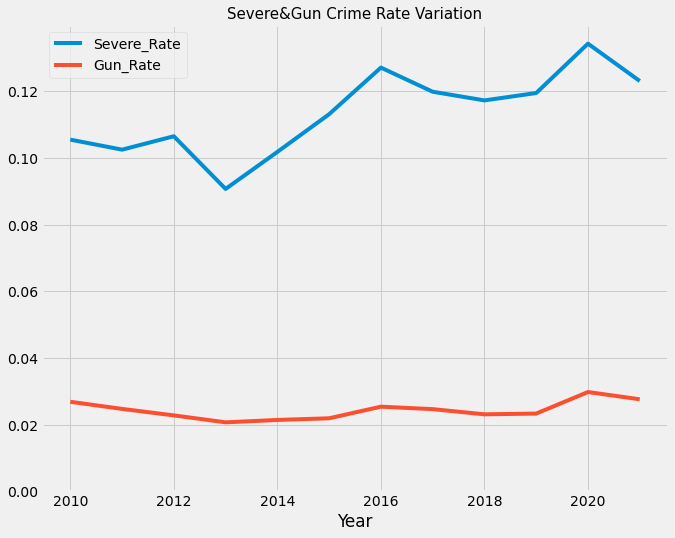

In [78]:
result[rate_list].plot(ylim=0,figsize=(10,8))
plt.title('Severe&Gun Crime Rate Variation',fontsize=15)

The figure below shows the average number of severe crime cases on each day, and the comparison of the average cases number on weekdays and weekends respectively. It can be seen that there is a significant increase in serious crime on weekends.

Text(0.5, 1.0, 'Severe Crime Data')

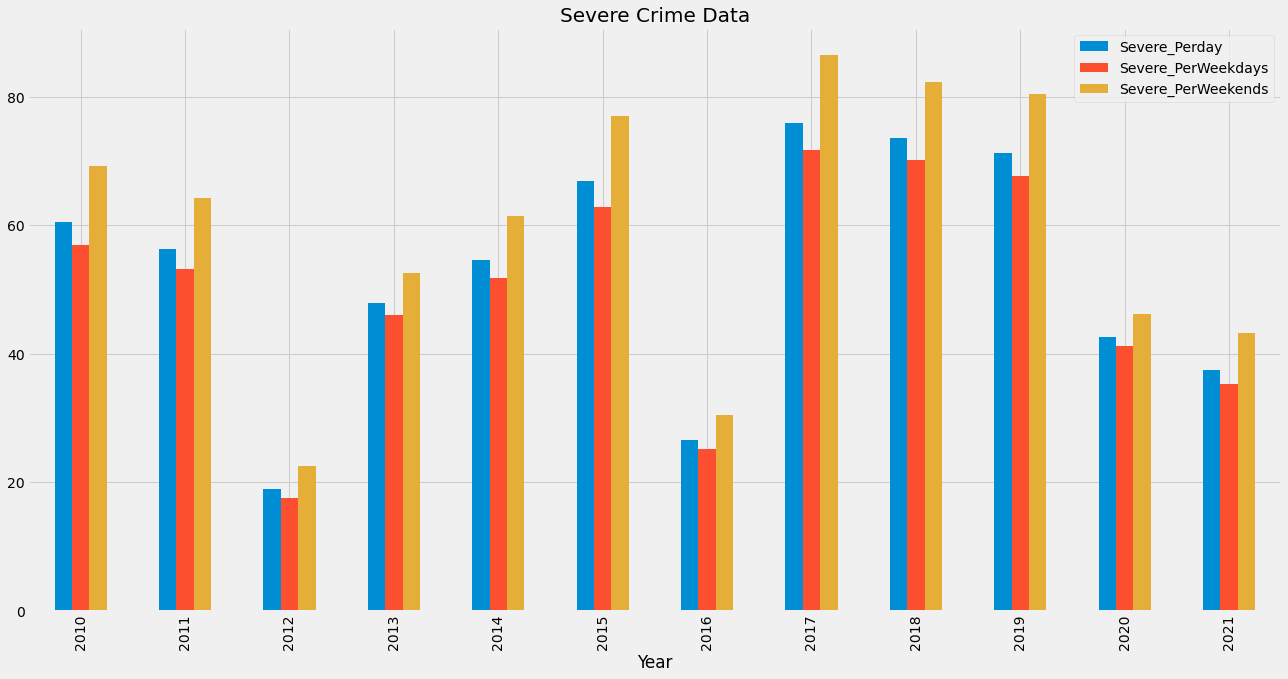

In [74]:
result[s_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Severe Crime Data',fontsize=20)

Likewise, gun crime also rose significantly over the weekends.

Text(0.5, 1.0, 'Gun Crime Data')

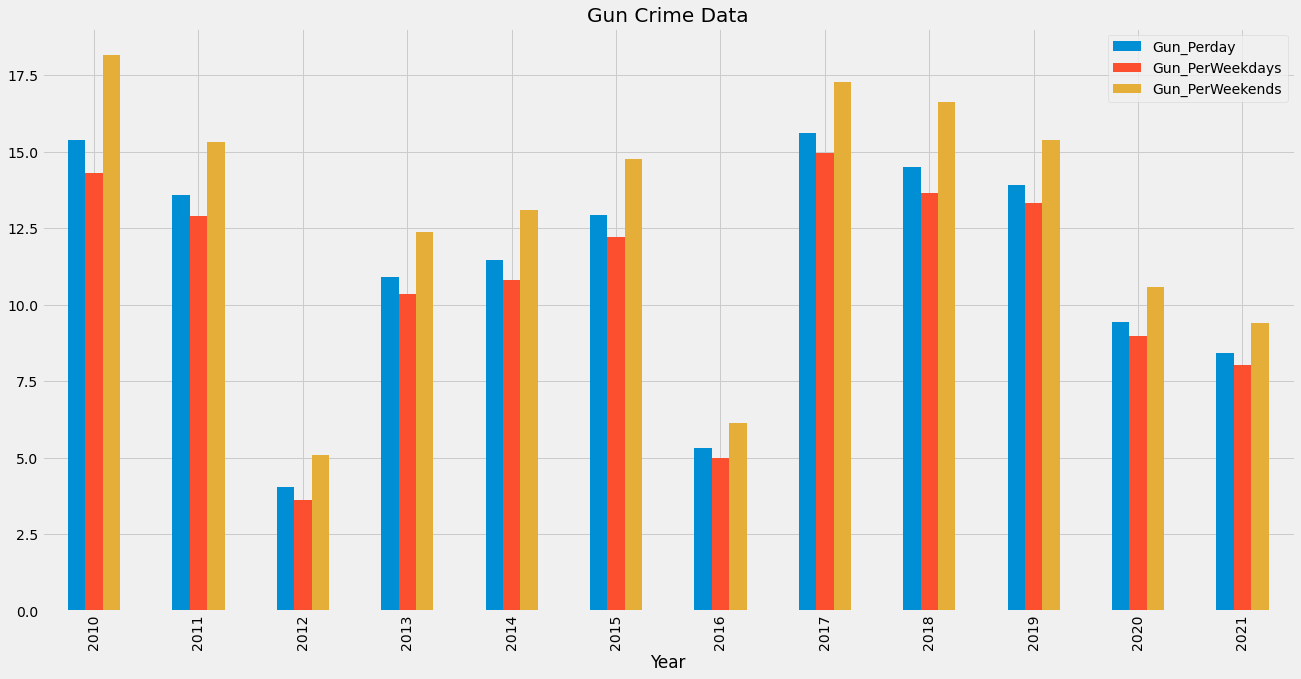

In [16]:
result[g_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Gun Crime Data',fontsize=20)

Text(0.5, 1.0, 'Crime Count on Weekdays/Weekends')

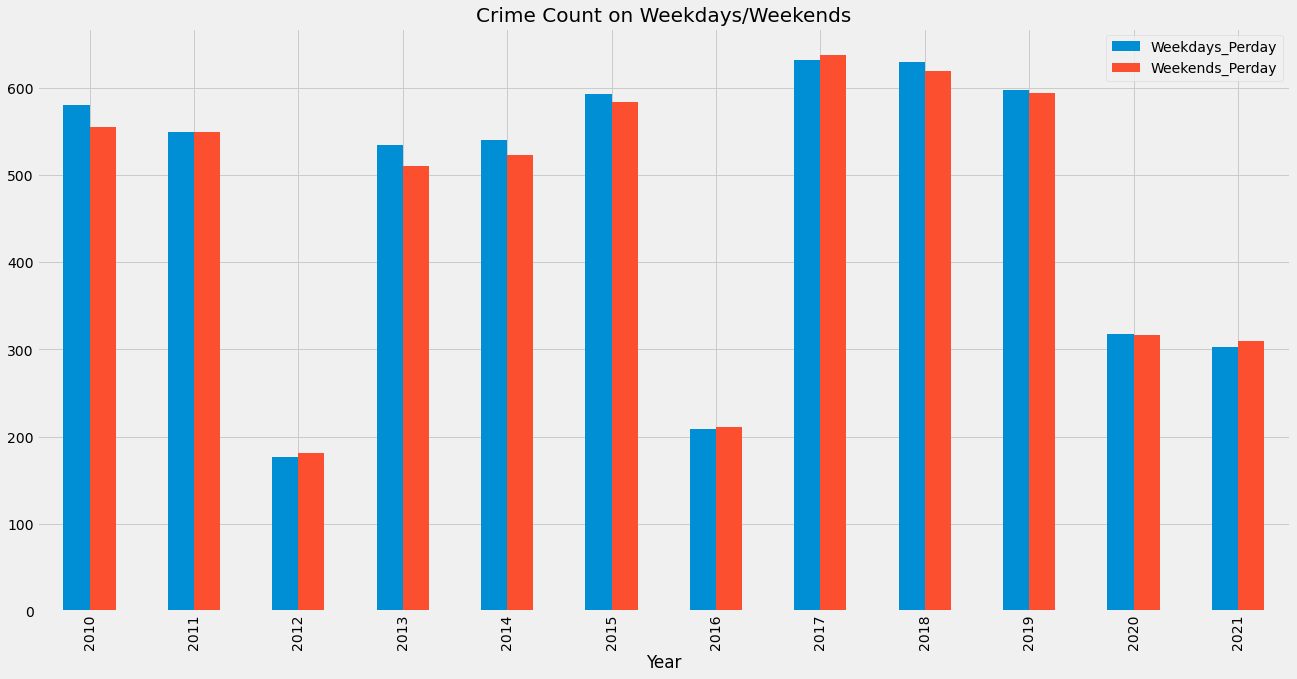

In [17]:
result[w_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Crime Count on Weekdays/Weekends',fontsize=20)

If we divide the day into seven parts, each occupying three to four hours, it can be seen that the time of day when crime occurs most is afternoon and dust. This may be because people get off work at this time, and there are the most pedestrians. We can see that there are not many crimes at night, which is contrary to our impression of "It's more dangerous at night". This may be because there are very few pedestrians at night. The volume of these crimes is already scary enough that no one wants to be the victim. 

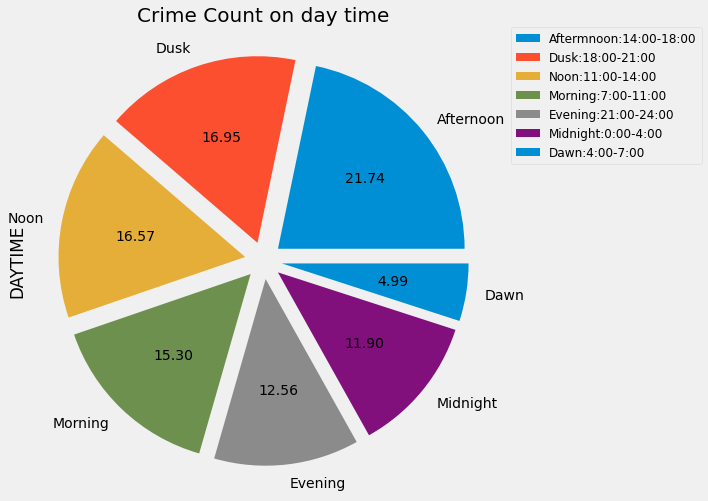

In [16]:
data['DAYTIME'].value_counts().plot.pie(figsize=(15,8),autopct='%.2f',explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Crime Count on day time',fontsize = 20)
elements = ["Aftermnoon:14:00-18:00", "Dusk:18:00-21:00", "Noon:11:00-14:00", "Morning:7:00-11:00", "Evening:21:00-24:00","Midnight:0:00-4:00","Dawn:4:00-7:00"]
plt.legend(elements,
           fontsize=12,
           loc=2, bbox_to_anchor=(1.03,1),borderaxespad=0)

plt.xticks(rotation = 90)
plt.show()

Text(0.5, 1.0, 'Crime Rate Variation on Daytime')

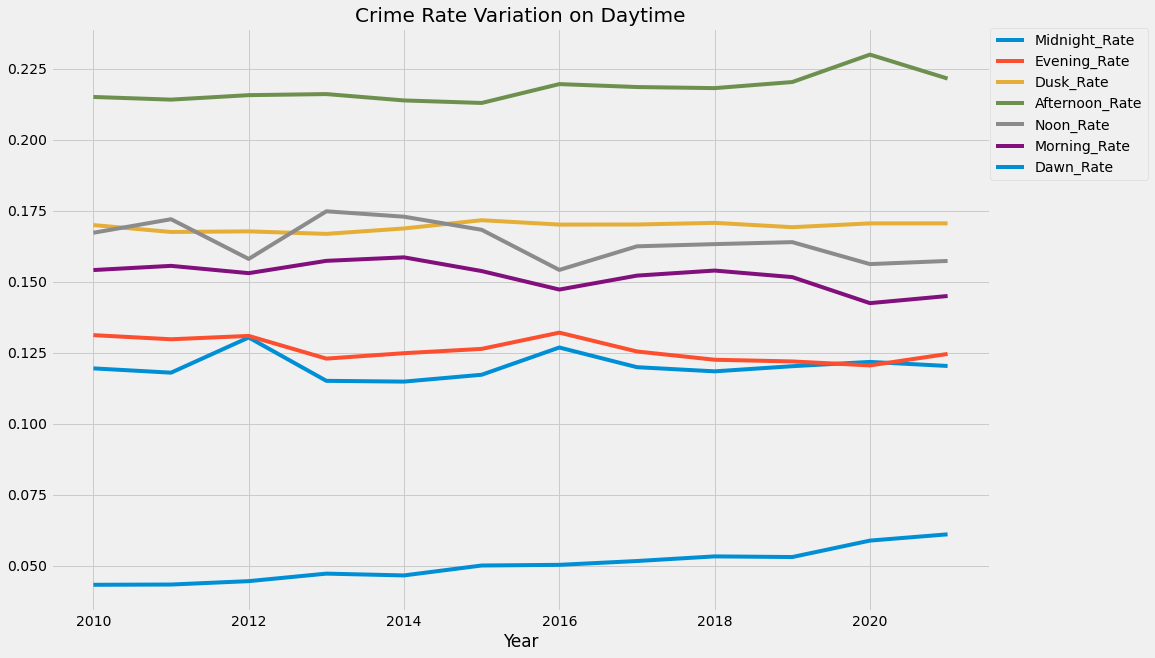

In [95]:
result[day_rate_list].plot(figsize=(15,10))
plt.legend(loc=2, bbox_to_anchor=(1,1),borderaxespad=0)
plt.title('Crime Rate Variation on Daytime',fontsize=20)

We can see that the most commonly used crime guns are hand guns and simulated guns such as air guns. It is not difficult to understand that hand guns are used the most because of their portability, but why are there so many simulatyed guns? Maybe the suspect just wanted to scare the others at first, and didn't intend to cause harm, but pulled the trigger on impulse and committed the crime. 

Text(0.5, 1.0, '8 Most-Used Weapon in Gun Crime')

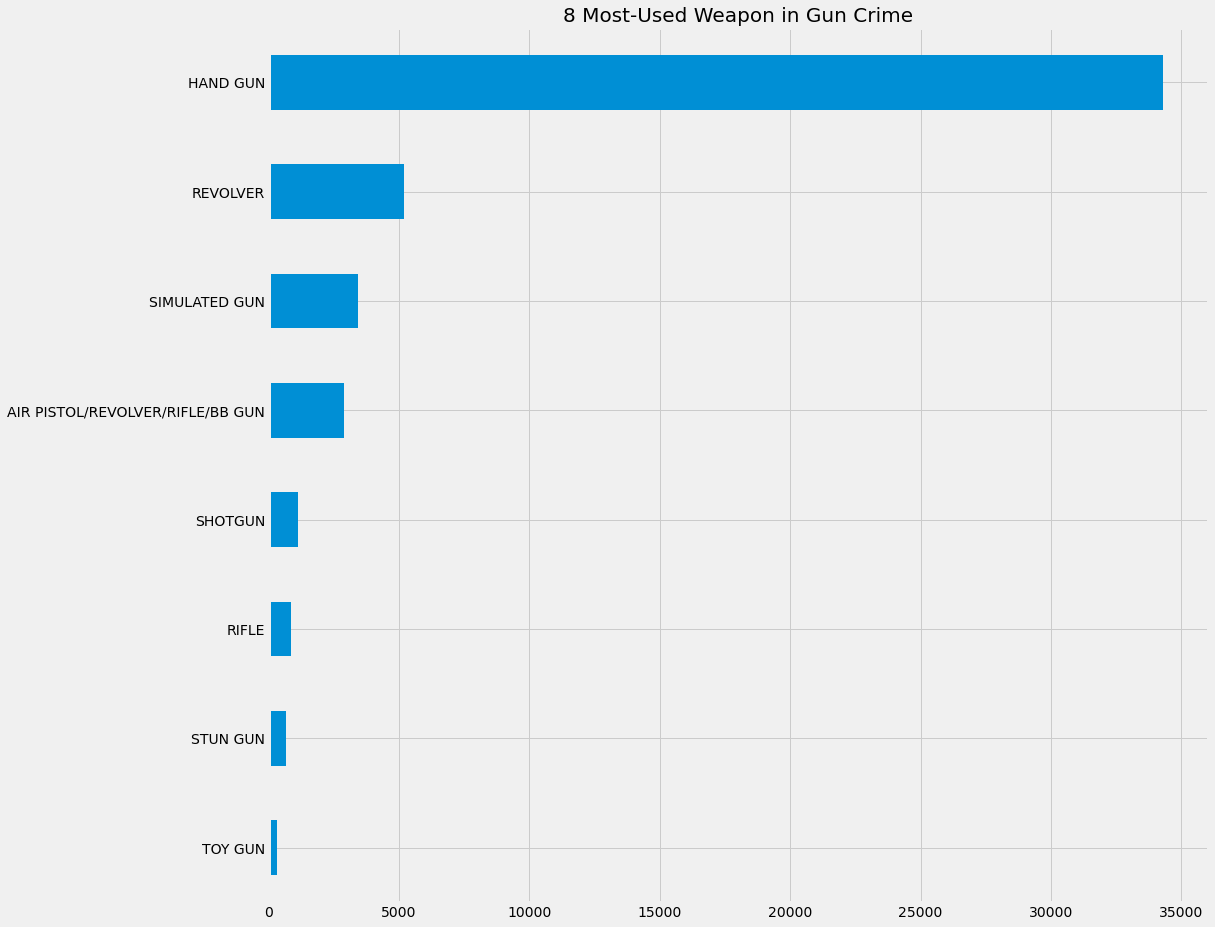

In [97]:
gun["Weapon Desc"].value_counts().iloc[:8].sort_values().plot(kind='barh')
plt.title('8 Most-Used Weapon in Gun Crime',fontsize=20)

In [70]:
data_tree=data


data_tree["Weapon Desc"].value_counts().iloc[:15].sort_values()

CLUB/BAT                4333
MACE/PEPPER SPRAY       4350
ROCK/THROWN OBJECT      4627
STICK                   4635
BOTTLE                  5153
REVOLVER                5188
VEHICLE                 7162
OTHER KNIFE             9760
OTHER FIREARM           9852
KNIFE                  13094
PISTOL                 13389
HAND GUN               34308
VERBAL THREAT          57173
OTHER WEAPON           58710
STRONG-ARM            420535
Name: Weapon Desc, dtype: int64

In [81]:
l=data_tree["Weapon Desc"].tolist()
for i in range(len(l)):
    if l[i]=="STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)":
        l[i]='STRONG-ARM'
    elif l[i]=="UNKNOWN WEAPON/OTHER WEAPON":
        l[i]='OTHER WEAPON'
    elif l[i]=="KNIFE WITH BLADE 6INCHES OR LESS":
        l[i]='KNIFE'
    elif l[i]=="UNKNOWN FIREARM":
        l[i]='OTHER FIREARM'
    elif l[i]=="SEMI-AUTOMATIC PISTOL":
        l[i]='PISTOL'
    elif l[i]=="ROCK/THROWN OBJECT":
        l[i]='THROWN'
    elif l[i]=="MACE/PEPPER SPRAY":
        l[i]='SPRAY'
for i in range(10):
    print(l[i]) 

nan
nan
nan
HAND GUN
STRONG-ARM
nan
nan
OTHER WEAPON
STRONG-ARM
nan


In [82]:
data_tree["Weapon Desc"]=l
data_tree["Weapon Desc"].value_counts().iloc[:15].sort_values()

REVOLVER           5188
VEHICLE            7162
OTHER KNIFE        9760
OTHER FIREARM      9852
KNIFE             13094
PISTOL            13389
HAND GUN          34308
VERBAL THREAT     57173
OTHER WEAPON      58710
STRONG-ARM       420535
Name: Weapon Desc, dtype: int64

This is the proportion of the 10 most commonly used weapons. Most people will use their bodies to attack each other in the fight, causing harm to others and may also hurt themselves. This is an irrational behavior. Hate can make people impulsive and act stupidly. 

(0.0, 100.0, 0.0, 100.0)

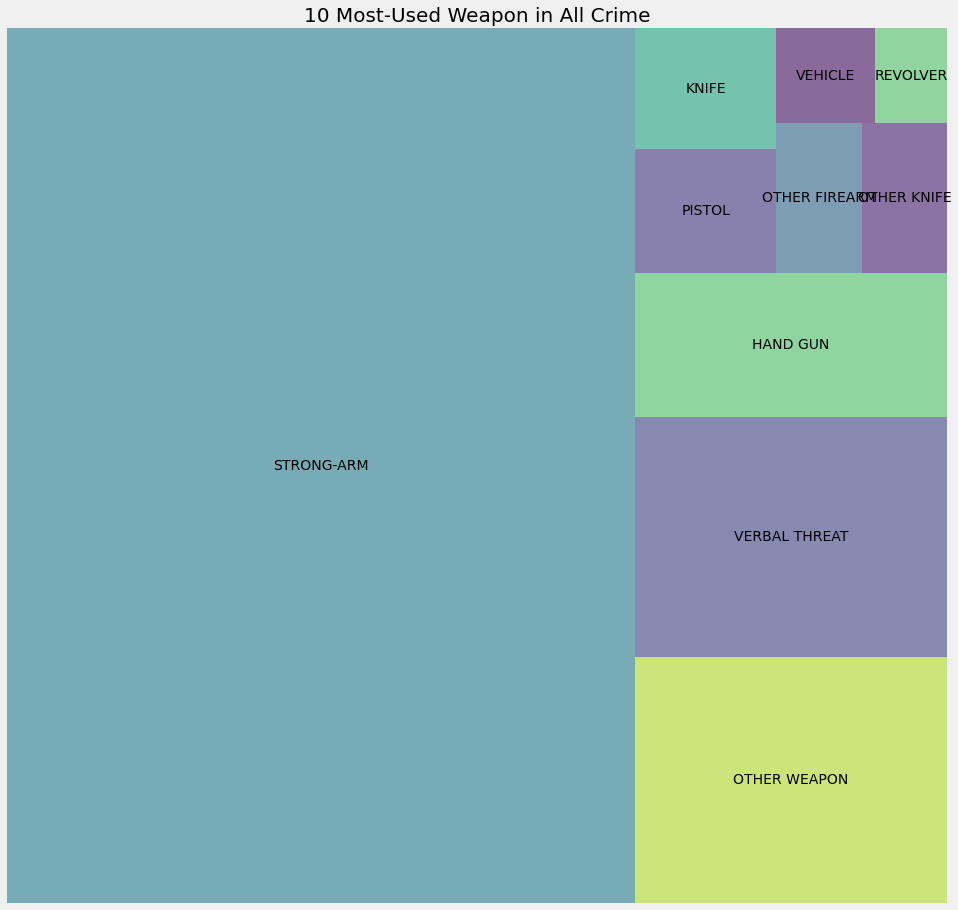

In [92]:
tree=data_tree['Weapon Desc'].value_counts().head(10)  
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')
squarify.plot(sizes=tree.values,label=tree.index,alpha=0.6)
plt.title('10 Most-Used Weapon in All Crime',fontsize=20)
plt.axis('off')


In [ ]:
#load data
data=pd.read_csv("data/Crime_Data_from_2010_to_2019.csv")
data.info()
result=pd.read_csv("data/result.csv")
result=result.set_index("Year",drop=True)
result.columns

#page 22
data['DAYTIME'].value_counts().plot.pie(figsize=(15,8),autopct='%.2f',explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Crime Count on day time',fontsize = 20)
elements = ["Aftermnoon:14:00-18:00", "Dusk:18:00-21:00", "Noon:11:00-14:00", "Morning:7:00-11:00", "Evening:21:00-24:00","Midnight:0:00-4:00","Dawn:4:00-7:00"]
plt.legend(elements,
           fontsize=12,
           loc=2, bbox_to_anchor=(1.03,1),borderaxespad=0)

plt.xticks(rotation = 90)
plt.show()

#page 23
result[s_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Severe Crime Data',fontsize=20)
result[g_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Gun Crime Data',fontsize=20)


#page 26
gun["Weapon Desc"].value_counts().iloc[:8].sort_values().plot(kind='barh')
plt.title('8 Most-Used Weapon in Gun Crime',fontsize=20)
tree=data_tree['Weapon Desc'].value_counts().head(10)  
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')
squarify.plot(sizes=tree.values,label=tree.index,alpha=0.6)
plt.title('10 Most-Used Weapon in All Crime',fontsize=20)
plt.axis('off')